# Predição de Sobreviventes no Acidente do Titanic

Sumarizando tudo que estudamos até agora, vamos criar um workflow de resolução de problemas de machine learning que pode ser replicável e adaptável para qualquer dataset sobre o qual pretendemos executar um algoritmo de machine learning. O Workflow consiste em seis passos:

> Definição do problema

> Aquisição de dados de treinamento e teste

> Manipulação, preparo e limpeza dos dados

> Análise, identificação de padrão e exploração dos dados

> Modelagem, predição e resolução do problema

> Visualização e apresentação da solução final

Não é um workflow linear, visto que podemos explorar nossos dados usando visualização, ou mesmo podemos suprimir um ou outro passo ou até combinar alguns passos num só. 

## Definição do problema

A partir de um conjunto de treino que lista se os passageiros sobreviveram ou não ao desastre do Titanic, é possível criar um modelo que determine num conjunto de teste que não possui informação de sobrevivência dos passegeiros se estes sobreviveram ou não?

In [131]:
#importando bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Aquisição de dados

In [132]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df] # quando for necessário aplicar operações em ambos os conjuntos

In [133]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [134]:
test_df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [135]:
train_df.info()
print()
print('-'*40)
print()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

----------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passeng

### Algumas observações:

> 1) Estamos lidando tanto com features numéricas quanto com features categóricas em ambos os conjuntos

> 2) Existem valores faltantes tanto no conjunto de treino quando no conjunto de teste

In [136]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [137]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## Validando hipóteses

Vamos verificar algumas hipóteses aqui:
> 1) A classe do passageiro(a), seu sexo, se ele(a) possui irmãos(ãs)/conjuge ou se possui pais/filhos interfere em sua sobreviência?

> 2) A faixa de idade interfere de alguma maneira na sobrevivência?

> 3) Todas as features possuem relevância ao predizer se um determinado passageiro irá sobreviver ou não?

> 4) O título de um passageiro(a) interfere em sua sobrevivência? 

#### ToDo 1) Hipótese 1

Crie uma função que receba três parâmetros: dataset, atributo1, atributo2 (este será sempre a coluna 'Survived'). Retorne um dataframe que mostre a proporção dos que sobreviveram para cada valor presente no atributo1. Considere 'Pclass', 'sex', 'SibSp' e 'Parch' como valores possíveis para o atributo1. 

In [138]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [139]:
train_df.shape[0]

891

In [140]:
#Dica: filtre os dois atributos (ds[[attr1, attr2]]) e depois agrupe por attr1 e depois tire a média (como attr1 é binário, 
#a média retorna a proporção)
# Resposta
atributos = ['Pclass', 'Sex', 'SibSp', 'Parch']

total = train_df.shape[0]

def perc_atributos(atributo):
    resultado = train_df.groupby(atributo)['Survived'].sum() / total
    return print(resultado)

for x in atributos:
    perc_atributos(x)

Pclass
1    0.152637
2    0.097643
3    0.133558
Name: Survived, dtype: float64
Sex
female    0.261504
male      0.122334
Name: Survived, dtype: float64
SibSp
0    0.235690
1    0.125701
2    0.014590
3    0.004489
4    0.003367
5    0.000000
8    0.000000
Name: Survived, dtype: float64
Parch
0    0.261504
1    0.072952
2    0.044893
3    0.003367
4    0.000000
5    0.001122
6    0.000000
Name: Survived, dtype: float64


#### ToDo 2) Hipótese 2

Plote um histograma da variável idade para cada resultado possível da variável Survived 

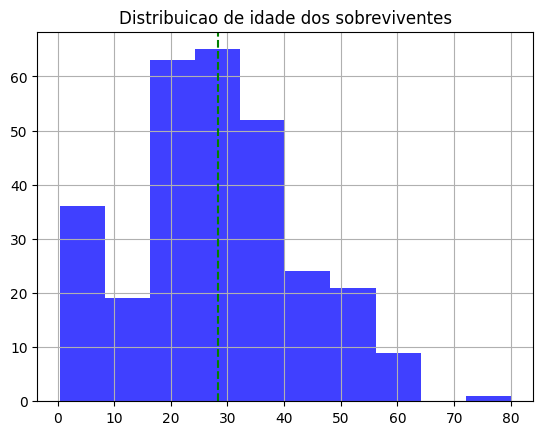

In [141]:
#Dica: olhe os parametros do método hist do Pandas
# Resposta

is_survived = train_df[train_df['Survived'] == 1]['Age']
media = is_survived.mean()
plt.hist(is_survived, facecolor='b', alpha=0.75)
plt.title('Distribuicao de idade dos sobreviventes')
plt.grid(True)
plt.axvline(media, color='green', linestyle='dashed', linewidth=1.5, label=f'Média: {media:.2f}')

plt.show()

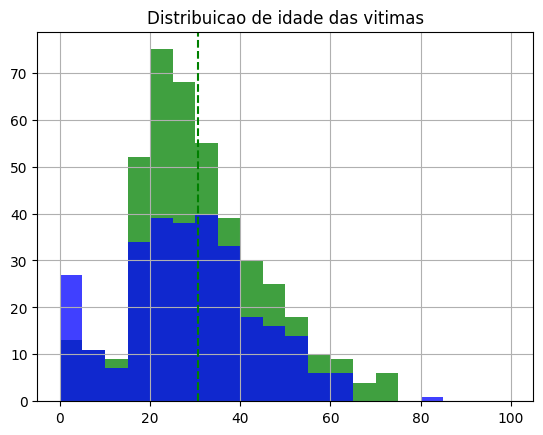

In [142]:
is_dead = train_df[train_df['Survived'] == 0]['Age'] 
media = is_dead.mean()
plt.hist(is_dead, facecolor='g', alpha=0.75, bins = 20, range = (0,100))
plt.hist(is_survived, facecolor='b', alpha=0.75, bins = 20, range = (0,100))
plt.title('Distribuicao de idade das vitimas')
plt.grid(True)
plt.axvline(media, color='green', linestyle='dashed', linewidth=1.5, label=f'Média: {media:.2f}')

plt.show()

#### ToDo 3) Hipótese 3

Julgue as features que estão presentes no dataset. Caso alguma não seja considerada para predizer a sobrevivência de um passageiro, elimine-a

In [143]:
# Resposta
#Manteria todas as as features analisadas até o momento. Entranto idade parece demonstrar uma distribuição muito equibibrada.

#### ToDo 4) Hipótese 4
Ao analisar a coluna Name, verificamos uma série de títulos associados ao nome de um passageiro(a). Esses são os títulos presentes na coluna Name: 'Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Mlle', 'Ms', 'Mme', 'Master', 'Miss', 'Mr', 'Mrs'.

Use regex para extrair os títulos a partir da coluna Name (faça para cada dataset). Insira os valores numa nova coluna chamada Title. Use Pandas.crosstab para verificar quantos passageiros de cada sexo possuem cada um dos títulos. [pd.crosstab](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html)

In [144]:
#Dica use o método str.extract do pandas
# Resposta
train_df['Titulo'] = train_df['Name'].str.extract(r'(Lady|Countess|Capt|Col|Don|Dr|Major|Rev|Sir|Jonkheer|Mlle|Ms|Mme|Master|Miss|Mr|Mrs)')


In [145]:
#Dica use o método str.extract do pandas
# Resposta
test_df['Titulo'] = test_df['Name'].str.extract(r'(Lady|Countess|Capt|Col|Don|Dr|Major|Rev|Sir|Jonkheer|Mlle|Ms|Mme|Master|Miss|Mr|Mrs)')


In [146]:
pd.crosstab(train_df['Titulo'], 
            train_df['Survived'], 
            aggfunc='count', 
            values=train_df['PassengerId']).fillna(0)

Survived,0,1
Titulo,,
Capt,1.0,0.0
Col,7.0,3.0
Countess,0.0,1.0
Don,1.0,0.0
Dr,5.0,5.0
Jonkheer,1.0,0.0
Lady,0.0,1.0
Major,1.0,1.0
Master,17.0,23.0


#### ToDo 5) Hipótese 4
Para cada dataset, faça as seguintes substituições na coluna Title:

> 'Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona' por 'Rare'

> 'Mlle' por 'Miss'

> 'Ms' por 'Miss'

> 'Mme' por 'Mrs'

Verifique a porcentagem de sobrevivência para cada grupo (título).

In [147]:
#Dica: use replace para fazer as substituições e a mesma solução do ToDo 1 para encontrar a porcentagem
# Resposta
train_df['Titulo'] = train_df['Titulo'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona','Ms','Mme','Mlle'],'Rare')
test_df['Titulo']  = test_df['Titulo'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona','Ms','Mme','Mlle'],'Rare')

In [148]:
result = train_df.groupby('Titulo').agg(
    PassengerCount=('PassengerId', 'count'),
    SurvivedSum=('Survived', 'sum')
)

# Adicionar a coluna de proporção
result['SurvivedRate'] = result['SurvivedSum'] / result['PassengerCount']

result


,PassengerCount,SurvivedSum,SurvivedRate
Titulo,,,
Master,40,23,0.575000
Miss,180,125,0.694444
Mr,631,178,0.282092
Rare,40,16,0.400000


#### ToDo 6) Hipótese 4
Mapeie cada um dos título para um número: 'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Rare':5. Faça a alteração nos dois datasets

In [149]:
# Dica: use o método map
# Resposta
titulo_map = {
    'Mr': 1,
    'Miss': 2,
    'Mrs': 3,
    'Master': 4,
    'Rare': 5
}

train_df['Titulo'] = train_df['Titulo'].map(titulo_map)
test_df['Titulo'] = test_df['Titulo'].map(titulo_map)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titulo
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,5
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


#### ToDo 7)
Agora podemos eliminar as colunas Name e PassengerId com segurança, já que não serão mais úteis para nossas análises. Elimine-as em ambos os datasets (se houver):

In [150]:
# Resposta
train_df.drop(columns=['PassengerId'], inplace=True)
train_df.drop(columns=['Name'], inplace=True)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titulo
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,1
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,S,5
887,1,1,female,19.0,0,0,112053,30.0000,B42,S,2
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,2
889,1,1,male,26.0,0,0,111369,30.0000,C148,C,1


In [151]:
test_df.drop(columns=['PassengerId'], inplace=True)
test_df.drop(columns=['Name'], inplace=True)
test_df

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titulo
0,3,male,34.5,0,0,330911,7.8292,NaN,Q,1
1,3,female,47.0,1,0,363272,7.0000,NaN,S,1
2,2,male,62.0,0,0,240276,9.6875,NaN,Q,1
3,3,male,27.0,0,0,315154,8.6625,NaN,S,1
4,3,female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1
414,1,female,39.0,0,0,PC 17758,108.9000,C105,C,5
415,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1
416,3,male,NaN,0,0,359309,8.0500,NaN,S,1


#### ToDo 8)
Mapeie os valores da coluna Sex para números: 'female':0, 'male':1. Faça a alteração em ambos os datasets

In [152]:
#Dica: use o método map - mesma solução ToDo 6
# Resposta
sex_map = {
    'female': 0,
    'male': 1
}

train_df['Sex'] = train_df['Sex'].map(sex_map)
test_df['Sex'] = test_df['Sex'].map(sex_map)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titulo
0,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C,1
2,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,1,1,0,35.0,1,0,113803,53.1000,C123,S,1
4,0,3,1,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,211536,13.0000,NaN,S,5
887,1,1,0,19.0,0,0,112053,30.0000,B42,S,2
888,0,3,0,NaN,1,2,W./C. 6607,23.4500,NaN,S,2
889,1,1,1,26.0,0,0,111369,30.0000,C148,C,1


#### ToDo 9)

Temos valores faltantes tanto em train_df quanto em test_df e isso ocorre em colunas diferentes. Assim, vamos ter que tratar cada caso de uma maneira:

Em train_df:

> preencha os valores faltantes da coluna Age com a mediana

> preencha os valores faltantes da coluna Embarked com a moda

Em test_df:

> preencha os valores faltantes da coluna Age com a mediana

> preencha os valores faltantes da coluna Fare com a mediana

In [153]:
train_df['Embarked'].mode()[0]

'S'

In [154]:
# Resposta
train_df['Age']      = train_df['Age'].fillna(train_df['Age'].median())
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

test_df['Age']  = test_df['Age'].fillna(test_df['Age'].median())
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())


In [155]:
#Verificando
print(train_df.isnull().sum())
print('-'*40)
test_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
Titulo        0
dtype: int64
----------------------------------------


Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       327
Embarked      0
Titulo        0
dtype: int64

#### ToDo 10
Precisamos ajustar os valores das colunas Age e Fare para valores ordinais numéricos. O código abaixo usa pd.cut para determinar as classes numéricas. O mesmo ocorre ao executar o código subsequente, mas dessa vez estamos usando pd.qcut, visto que os valores são contínuos, o que exige a classificação por quartis

In [156]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

/var/folders/jg/ltscjj4d0cn9rp9tg94kl1kr0000gn/T/ipykernel_83084/987560108.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)


,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.344168
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [157]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

/var/folders/jg/ltscjj4d0cn9rp9tg94kl1kr0000gn/T/ipykernel_83084/2916669673.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)


,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


Elimine as colunas AgeBand e FareBand depois de realizadas as operações

In [158]:
#Dica: utilize o método loc dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
# Resposta
train_df.loc[train_df['Age'] <= 16, 'Age'] = 0
train_df.loc[(train_df['Age'] > 16) & (train_df['Age'] <= 32), 'Age'] = 1
train_df.loc[(train_df['Age'] > 32) & (train_df['Age'] <= 48), 'Age'] = 2
train_df.loc[(train_df['Age'] > 48) & (train_df['Age'] <= 64), 'Age'] = 3
train_df.loc[train_df['Age'] > 64, 'Age'] = 4


In [159]:
train_df.loc[train_df['Fare'] <= 8, 'Fare'] = 0
train_df.loc[(train_df['Fare'] > 8) & (train_df['Fare'] <= 14), 'Fare'] = 1
train_df.loc[(train_df['Fare'] > 14) & (train_df['Fare'] <= 31), 'Fare'] = 2
train_df.loc[(train_df['Fare'] > 31), 'Fare'] = 3

In [160]:
train_df.drop(columns=['AgeBand'], inplace=True)
train_df.drop(columns=['FareBand'], inplace=True)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titulo
0,0,3,1,1.0,1,0,A/5 21171,0.0,NaN,S,1
1,1,1,0,2.0,1,0,PC 17599,3.0,C85,C,1
2,1,3,0,1.0,0,0,STON/O2. 3101282,0.0,NaN,S,2
3,1,1,0,2.0,1,0,113803,3.0,C123,S,1
4,0,3,1,2.0,0,0,373450,1.0,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,1.0,0,0,211536,1.0,NaN,S,5
887,1,1,0,1.0,0,0,112053,2.0,B42,S,2
888,0,3,0,1.0,1,2,W./C. 6607,2.0,NaN,S,2
889,1,1,1,1.0,0,0,111369,2.0,C148,C,1


In [161]:
test_df.loc[test_df['Age'] <= 16, 'Age'] = 0
test_df.loc[(test_df['Age'] > 16) & (test_df['Age'] <= 32), 'Age'] = 1
test_df.loc[(test_df['Age'] > 32) & (test_df['Age'] <= 48), 'Age'] = 2
test_df.loc[(test_df['Age'] > 48) & (test_df['Age'] <= 64), 'Age'] = 3
test_df.loc[test_df['Age'] > 64, 'Age'] = 4

test_df.loc[test_df['Fare'] <= 8, 'Fare'] = 0
test_df.loc[(test_df['Fare'] > 8) & (test_df['Fare'] <= 14), 'Fare'] = 1
test_df.loc[(test_df['Fare'] > 14) & (test_df['Fare'] <= 31), 'Fare'] = 2
test_df.loc[(test_df['Fare'] > 31), 'Fare'] = 3

test_df

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titulo
0,3,1,2.0,0,0,330911,0.0,NaN,Q,1
1,3,0,2.0,1,0,363272,0.0,NaN,S,1
2,2,1,3.0,0,0,240276,1.0,NaN,Q,1
3,3,1,1.0,0,0,315154,1.0,NaN,S,1
4,3,0,1.0,1,1,3101298,1.0,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...
413,3,1,1.0,0,0,A.5. 3236,1.0,NaN,S,1
414,1,0,2.0,0,0,PC 17758,3.0,C105,C,5
415,3,1,2.0,0,0,SOTON/O.Q. 3101262,0.0,NaN,S,1
416,3,1,1.0,0,0,359309,1.0,NaN,S,1


#### ToDo 11)
Mapeie os valores da coluna Embarked para números: 'S':0, 'C':1, 'Q':2. Faça a alteração em ambos os datasets

In [162]:
#Dica: use o método map - mesma solução ToDo 6
# Resposta
emb_map = {
    'S': 0,
    'C': 1,
    'Q':2
}

train_df['Embarked'] = train_df['Embarked'].map(emb_map)
test_df['Embarked'] = test_df['Embarked'].map(emb_map)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titulo
0,0,3,1,1.0,1,0,A/5 21171,0.0,NaN,0,1
1,1,1,0,2.0,1,0,PC 17599,3.0,C85,1,1
2,1,3,0,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,2
3,1,1,0,2.0,1,0,113803,3.0,C123,0,1
4,0,3,1,2.0,0,0,373450,1.0,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,1.0,0,0,211536,1.0,NaN,0,5
887,1,1,0,1.0,0,0,112053,2.0,B42,0,2
888,0,3,0,1.0,1,2,W./C. 6607,2.0,NaN,0,2
889,1,1,1,1.0,0,0,111369,2.0,C148,1,1


#### ToDo 12)
Crie uma nova coluna chamada FamilySize que será a soma de SibSp e Parch + 1(caso seja somente o(a) passageiro(a)). Depois, crie uma nova coluna chamada IsAlone, cujo valor será 0, se FamilySize for igual a 1, ou 1, caso contrário

In [163]:
#Dica: utilize loc
# Resposta
train_df['FamilySize'] = train_df['Parch'] + train_df['SibSp'] +1
train_df['IsAlone'] =  train_df['FamilySize'].apply(lambda x: 1 if x == 1 else 0)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titulo,FamilySize,IsAlone
0,0,3,1,1.0,1,0,A/5 21171,0.0,NaN,0,1,2,0
1,1,1,0,2.0,1,0,PC 17599,3.0,C85,1,1,2,0
2,1,3,0,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,2,1,1
3,1,1,0,2.0,1,0,113803,3.0,C123,0,1,2,0
4,0,3,1,2.0,0,0,373450,1.0,NaN,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,1.0,0,0,211536,1.0,NaN,0,5,1,1
887,1,1,0,1.0,0,0,112053,2.0,B42,0,2,1,1
888,0,3,0,1.0,1,2,W./C. 6607,2.0,NaN,0,2,4,0
889,1,1,1,1.0,0,0,111369,2.0,C148,1,1,1,1


In [164]:
test_df['FamilySize'] = test_df['Parch'] + test_df['SibSp'] +1
test_df['IsAlone'] =  test_df['FamilySize'].apply(lambda x: 1 if x == 1 else 0)
test_df

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titulo,FamilySize,IsAlone
0,3,1,2.0,0,0,330911,0.0,NaN,2,1,1,1
1,3,0,2.0,1,0,363272,0.0,NaN,0,1,2,0
2,2,1,3.0,0,0,240276,1.0,NaN,2,1,1,1
3,3,1,1.0,0,0,315154,1.0,NaN,0,1,1,1
4,3,0,1.0,1,1,3101298,1.0,NaN,0,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,1,1.0,0,0,A.5. 3236,1.0,NaN,0,1,1,1
414,1,0,2.0,0,0,PC 17758,3.0,C105,1,5,1,1
415,3,1,2.0,0,0,SOTON/O.Q. 3101262,0.0,NaN,0,1,1,1
416,3,1,1.0,0,0,359309,1.0,NaN,0,1,1,1


Elimine as colunas Parch, SibSp e FamilySize, pois não vamos utilizá-las mais

In [165]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

Agora que fizemos todas as correções em nossos datasets, podemos ver como ficaram:

In [166]:
train_df.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Titulo,IsAlone
0,0,3,1,1.0,A/5 21171,0.0,NaN,0,1,0
1,1,1,0,2.0,PC 17599,3.0,C85,1,1,0
2,1,3,0,1.0,STON/O2. 3101282,0.0,NaN,0,2,1
3,1,1,0,2.0,113803,3.0,C123,0,1,0
4,0,3,1,2.0,373450,1.0,NaN,0,1,1


In [167]:
test_df.head()

,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Titulo,IsAlone
0,3,1,2.0,330911,0.0,NaN,2,1,1
1,3,0,2.0,363272,0.0,NaN,0,1,0
2,2,1,3.0,240276,1.0,NaN,2,1,1
3,3,1,1.0,315154,1.0,NaN,0,1,1
4,3,0,1.0,3101298,1.0,NaN,0,1,0


In [168]:
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)

## Treinando nosso algoritmo

In [169]:
from sklearn.linear_model import LogisticRegression
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]

X_test  = test_df#.drop("PassengerId", axis=1).copy()
X_train.shape, y_train.shape, X_test.shape

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

78.56

## Testando com novas amostras

Informações do passageiro:
> 1º classe: 1

> Sexo feminimo: 1

> Idade 25: 1

> Fare: 3

> Embarked: 0

> Title: 2

> isAlone: 0

In [170]:
logreg.predict(np.array([[1,1,1,3,0,2,0]]))

/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

### Fiquem a vontade para testar com novas amostrar. ;)